In [1]:
import pandas as pd
import os

In [2]:
import librosa

In [3]:

Tess = r"C:\Users\furka\Desktop\Labellenmis"

In [4]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '\\' + dir )
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[1]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir  + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df)

     Emotions                                               Path
0       angry  C:\Users\furka\Desktop\Labellenmis/angry/Ses01...
1       angry  C:\Users\furka\Desktop\Labellenmis/angry/Ses01...
2       angry  C:\Users\furka\Desktop\Labellenmis/angry/Ses01...
3       angry  C:\Users\furka\Desktop\Labellenmis/angry/Ses01...
4       angry  C:\Users\furka\Desktop\Labellenmis/angry/Ses01...
...       ...                                                ...
7375      sad  C:\Users\furka\Desktop\Labellenmis/sad/Ses05M_...
7376      sad  C:\Users\furka\Desktop\Labellenmis/sad/Ses05M_...
7377      sad  C:\Users\furka\Desktop\Labellenmis/sad/Ses05M_...
7378      sad  C:\Users\furka\Desktop\Labellenmis/sad/Ses05M_...
7379      sad  C:\Users\furka\Desktop\Labellenmis/sad/Ses05M_...

[7380 rows x 2 columns]


In [7]:
Tess_df['Emotions'].value_counts()

frustration    1849
neutral        1708
angry          1103
sad            1084
excited        1041
happy           595
Name: Emotions, dtype: int64

In [8]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [9]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(Tess_df.iterrows()):
    file_name = os.path.join(os.path.abspath(Tess),str(row["Path"]))
    final_class_labels=row["Emotions"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

7380it [04:41, 26.22it/s]


In [10]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['Path','Emotions'])
extracted_features_df.head()
# Storing the dataframe to pickle for further processing
extracted_features_df.to_pickle("extracted_df.pkl")
extracted_features_df.head()

,Path,Emotions
0,"[-322.04932, 136.34343, -30.183025, 23.66656, ...",angry
1,"[-289.68463, 122.64088, -20.96545, 35.34087, -...",angry
2,"[-199.22662, 127.5769, -54.481873, 17.674513, ...",angry
3,"[-394.34372, 142.89366, -31.46713, 46.804314, ...",angry
4,"[-391.47177, 124.91465, -24.61907, 23.692755, ...",angry


In [11]:
final = pd.read_pickle("./extracted_df.pkl")
X = np.array(final["Path"].tolist())
y = np.array(final["Emotions"].tolist())

In [12]:
        import IPython.display as ipd
        import librosa
        import librosa.display
        import pandas as pd
        import os, time, warnings
        import seaborn as sns
        import numpy as np
        from tqdm import tqdm
        import matplotlib.pyplot as plt
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import LabelEncoder
        from tensorflow.keras.utils import to_categorical
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import (
            Dense,
            Conv1D,
            MaxPooling1D,
            BatchNormalization,
            Dropout, 
            Flatten,
            Conv2D,
            MaxPool2D,
        )

In [13]:
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])


Number of training samples =  6642
Number of testing samples =  738


In [28]:
from keras.optimizers import RMSprop
from keras.optimizers import Adam

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(2000, activation="relu", input_shape=(40,)))
ANN_Model.add(Dense(1500, activation="relu"))
ANN_Model.add(Dense(1000, activation="relu"))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(75, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

optimizer = Adam(learning_rate=0.0001)
ANN_Model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 2000)              82000     
                                                                 
 dense_38 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_39 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_40 (Dense)            (None, 750)               750750    
                                                                 
 dense_41 (Dense)            (None, 250)               187750    
                                                                 
 dense_42 (Dense)            (None, 100)               25100     
                                                                 
 dense_43 (Dense)            (None, 75)               

In [29]:
ANN_Model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)


In [31]:
num_epochs = 150
num_batch_size = 64

t0 = time.time()

history = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")


Epoch 1/150
104/104 [==============================] - 7s 72ms/step - loss: 1.3305 - accuracy: 0.4643 - val_loss: 1.4348 - val_accuracy: 0.4390
Epoch 2/150
104/104 [==============================] - 7s 70ms/step - loss: 1.3360 - accuracy: 0.4581 - val_loss: 1.4192 - val_accuracy: 0.4241
Epoch 3/150
104/104 [==============================] - 7s 68ms/step - loss: 1.3222 - accuracy: 0.4642 - val_loss: 1.4592 - val_accuracy: 0.4363
Epoch 4/150
104/104 [==============================] - 7s 70ms/step - loss: 1.3108 - accuracy: 0.4711 - val_loss: 1.4509 - val_accuracy: 0.3984
Epoch 5/150
104/104 [==============================] - 7s 70ms/step - loss: 1.2962 - accuracy: 0.4764 - val_loss: 1.4118 - val_accuracy: 0.4377
Epoch 6/150
104/104 [==============================] - 7s 70ms/step - loss: 1.2936 - accuracy: 0.4780 - val_loss: 1.4468 - val_accuracy: 0.4214
Epoch 7/150
104/104 [==============================] - 7s 70ms/step - loss: 1.2969 - accuracy: 0.4807 - val_loss: 1.4442 - val_accuracy:

104/104 [==============================] - 8s 74ms/step - loss: 0.4086 - accuracy: 0.8571 - val_loss: 2.4122 - val_accuracy: 0.4458
Epoch 58/150
104/104 [==============================] - 7s 68ms/step - loss: 0.3736 - accuracy: 0.8732 - val_loss: 2.5025 - val_accuracy: 0.4431
Epoch 59/150
104/104 [==============================] - 7s 64ms/step - loss: 0.3465 - accuracy: 0.8836 - val_loss: 2.5905 - val_accuracy: 0.4404
Epoch 60/150
104/104 [==============================] - 6s 62ms/step - loss: 0.3553 - accuracy: 0.8756 - val_loss: 2.6904 - val_accuracy: 0.4390
Epoch 61/150
104/104 [==============================] - 6s 62ms/step - loss: 0.3215 - accuracy: 0.8937 - val_loss: 2.7453 - val_accuracy: 0.4295
Epoch 62/150
104/104 [==============================] - 6s 60ms/step - loss: 0.3233 - accuracy: 0.8874 - val_loss: 2.8232 - val_accuracy: 0.4268
Epoch 63/150
104/104 [==============================] - 6s 62ms/step - loss: 0.2563 - accuracy: 0.9157 - val_loss: 2.9587 - val_accuracy: 0.429

104/104 [==============================] - 6s 60ms/step - loss: 0.0114 - accuracy: 0.9995 - val_loss: 4.0975 - val_accuracy: 0.4322
Epoch 114/150
104/104 [==============================] - 6s 58ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 4.2215 - val_accuracy: 0.4472
Epoch 115/150
104/104 [==============================] - 6s 60ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 4.3166 - val_accuracy: 0.4485
Epoch 116/150
104/104 [==============================] - 6s 58ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 4.4199 - val_accuracy: 0.4485
Epoch 117/150
104/104 [==============================] - 6s 60ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 4.5268 - val_accuracy: 0.4485
Epoch 118/150
104/104 [==============================] - 6s 60ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.5888 - val_accuracy: 0.4526
Epoch 119/150
104/104 [==============================] - 6s 59ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.6396 - val_accuracy:

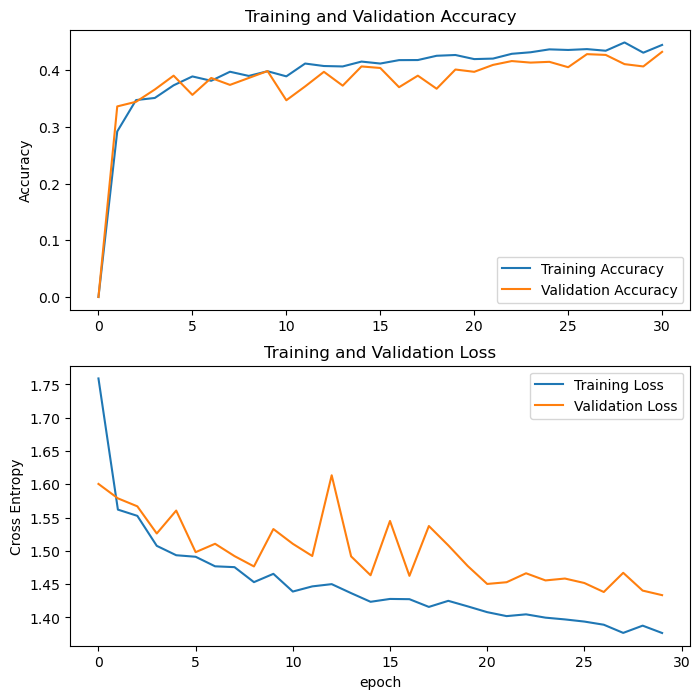

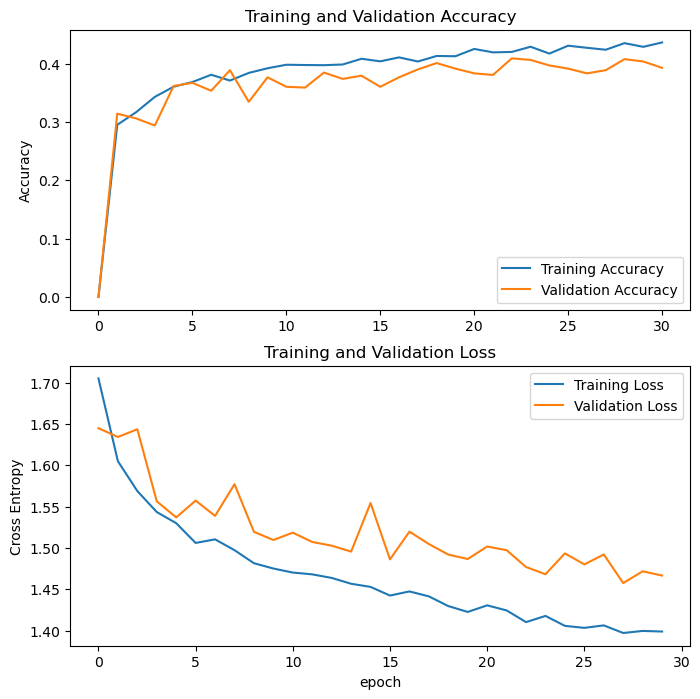

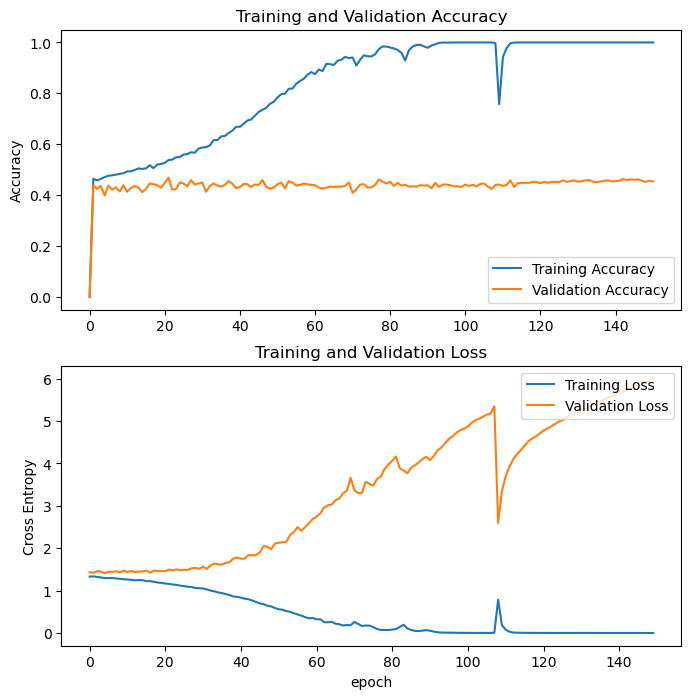

AttributeError: module 'matplotlib' has no attribute 'pyplot'

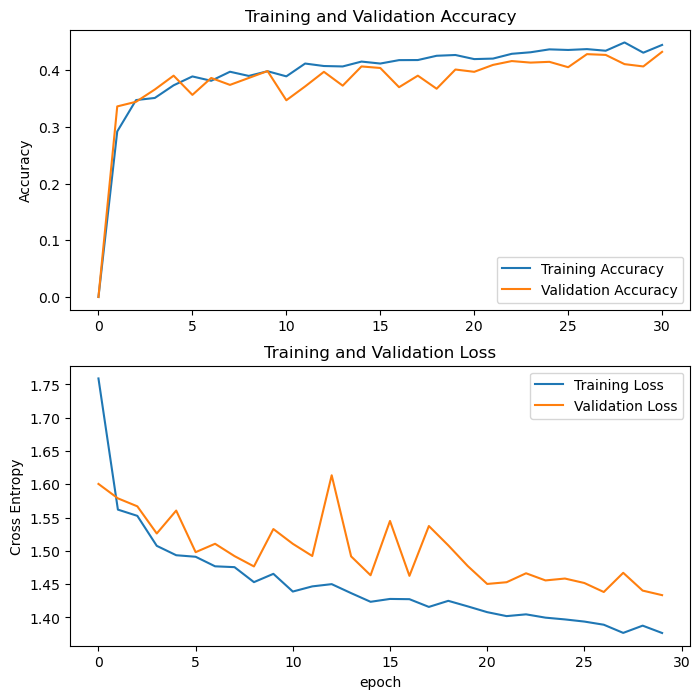

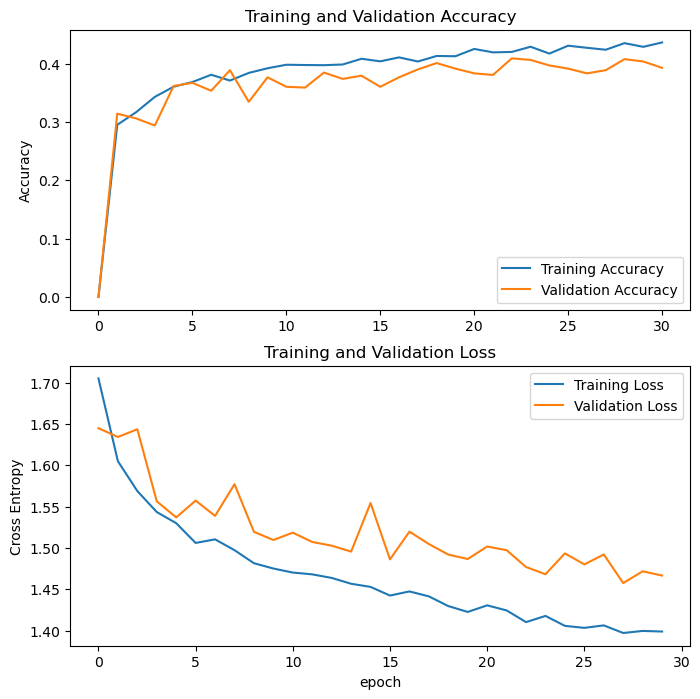

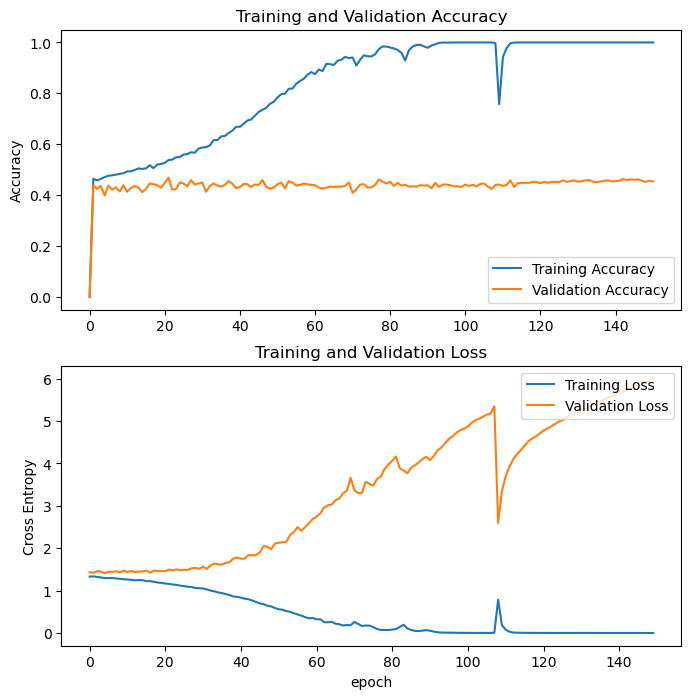

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [32]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [33]:
emotion_names=extracted_features_df['Emotions'].unique()


In [34]:
y_pred = ANN_Model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

24/24 [==============================] - 0s 7ms/step


array([3, 1, 5, 2, 1, 2, 4, 0, 2, 1, 0, 2, 5, 0, 3, 4, 1, 1, 2, 3, 3, 0,
       0, 1, 5, 2, 4, 4, 0, 0, 4, 3, 5, 4, 2, 4, 2, 2, 1, 4, 0, 2, 4, 0,
       4, 1, 0, 0, 4, 4, 5, 5, 5, 3, 5, 5, 2, 3, 5, 3, 1, 4, 2, 2, 4, 0,
       1, 4, 2, 0, 4, 5, 2, 2, 5, 2, 5, 1, 2, 0, 4, 0, 2, 4, 0, 5, 2, 1,
       5, 2, 0, 5, 4, 3, 2, 2, 1, 5, 0, 0, 4, 1, 4, 0, 4, 1, 1, 5, 1, 1,
       1, 0, 2, 1, 0, 5, 3, 2, 5, 1, 0, 5, 2, 0, 5, 1, 2, 2, 5, 2, 4, 2,
       1, 4, 1, 1, 1, 0, 2, 3, 4, 5, 2, 2, 5, 2, 3, 4, 0, 4, 4, 0, 4, 1,
       5, 4, 5, 5, 5, 4, 2, 3, 5, 0, 5, 5, 2, 1, 2, 2, 5, 0, 2, 1, 4, 2,
       1, 3, 5, 5, 5, 4, 2, 2, 1, 2, 4, 4, 2, 1, 4, 2, 2, 1, 2, 0, 4, 2,
       2, 2, 2, 4, 4, 4, 4, 5, 2, 2, 1, 2, 2, 4, 0, 5, 1, 3, 4, 4, 4, 3,
       2, 0, 1, 2, 0, 3, 4, 4, 4, 2, 1, 4, 4, 2, 2, 1, 0, 1, 4, 0, 0, 1,
       4, 4, 4, 2, 4, 0, 3, 2, 1, 0, 4, 1, 0, 5, 1, 0, 4, 3, 1, 1, 2, 2,
       0, 0, 4, 5, 2, 0, 2, 0, 5, 1, 4, 2, 3, 0, 2, 2, 0, 1, 5, 4, 4, 2,
       2, 5, 2, 2, 0, 5, 2, 1, 2, 3, 5, 4, 1, 2, 2,

In [35]:
y_check=np.argmax(y_test,axis=1)
y_check

array([1, 2, 5, 3, 2, 2, 2, 2, 2, 2, 0, 0, 5, 1, 3, 2, 1, 4, 3, 3, 1, 2,
       0, 2, 2, 1, 4, 5, 4, 0, 2, 0, 3, 4, 1, 4, 4, 2, 1, 2, 0, 2, 4, 4,
       4, 3, 2, 2, 2, 4, 4, 4, 5, 1, 5, 3, 0, 5, 1, 3, 1, 4, 0, 0, 4, 0,
       0, 4, 2, 0, 4, 0, 0, 1, 5, 1, 3, 4, 2, 4, 4, 2, 0, 0, 2, 5, 2, 1,
       4, 0, 1, 4, 3, 1, 2, 2, 4, 5, 2, 0, 4, 2, 4, 4, 2, 0, 2, 5, 1, 1,
       5, 0, 1, 2, 0, 3, 3, 4, 2, 1, 1, 5, 5, 0, 5, 3, 4, 1, 5, 4, 4, 5,
       2, 4, 1, 4, 1, 1, 0, 3, 4, 5, 2, 2, 5, 1, 4, 0, 0, 2, 4, 2, 2, 1,
       3, 4, 5, 5, 3, 4, 1, 0, 5, 4, 5, 4, 0, 1, 2, 1, 2, 2, 2, 4, 5, 2,
       1, 5, 5, 5, 5, 2, 5, 4, 4, 2, 2, 4, 2, 1, 2, 0, 0, 2, 4, 2, 2, 2,
       2, 5, 2, 2, 4, 5, 4, 5, 2, 0, 3, 4, 0, 1, 0, 1, 2, 4, 2, 4, 2, 3,
       5, 2, 2, 0, 1, 0, 3, 4, 0, 2, 1, 4, 0, 2, 0, 0, 0, 1, 5, 0, 2, 1,
       4, 1, 0, 2, 5, 2, 1, 4, 0, 2, 2, 2, 0, 4, 3, 2, 2, 4, 2, 2, 2, 4,
       1, 4, 4, 4, 2, 2, 0, 1, 5, 1, 4, 2, 0, 0, 2, 4, 1, 1, 2, 4, 2, 2,
       2, 5, 2, 5, 0, 2, 2, 0, 3, 4, 5, 2, 0, 4, 2,

In [36]:
loss,accuracy=ANN_Model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 6.005956172943115
Test Accuracy: 0.4539295434951782


AttributeError: module 'matplotlib' has no attribute 'axes'

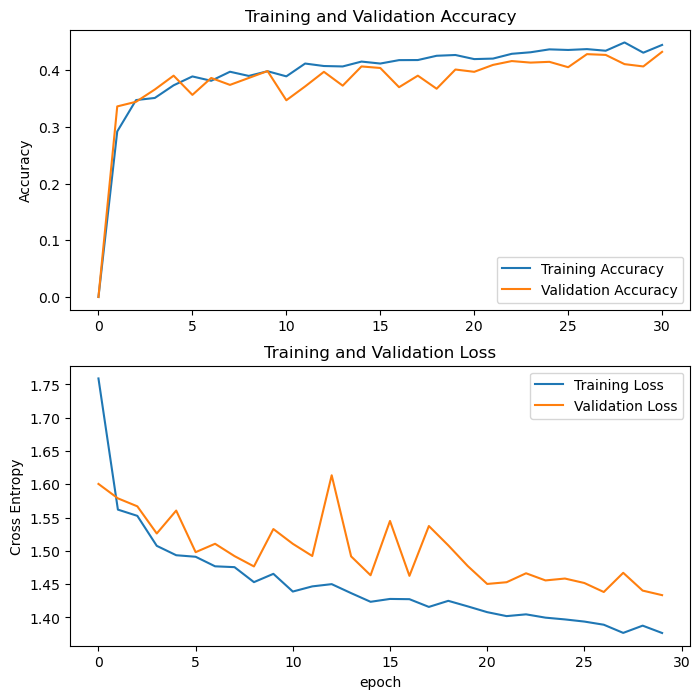

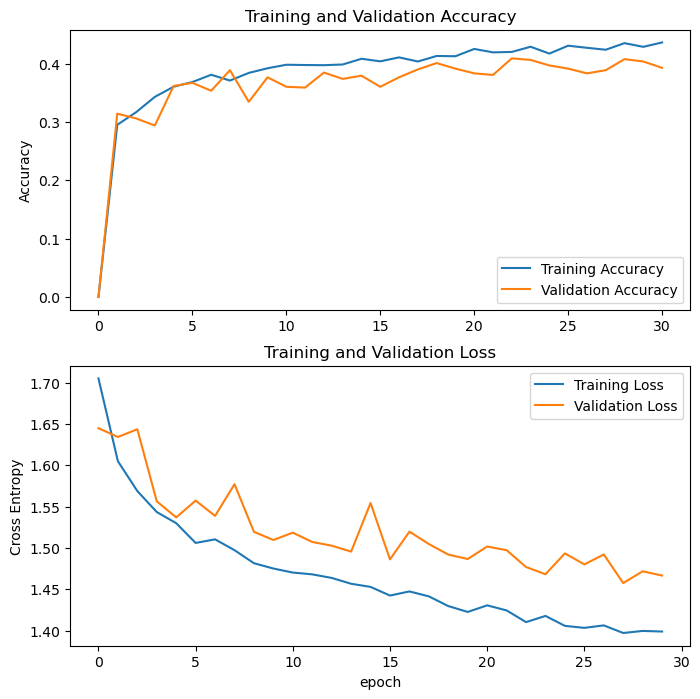

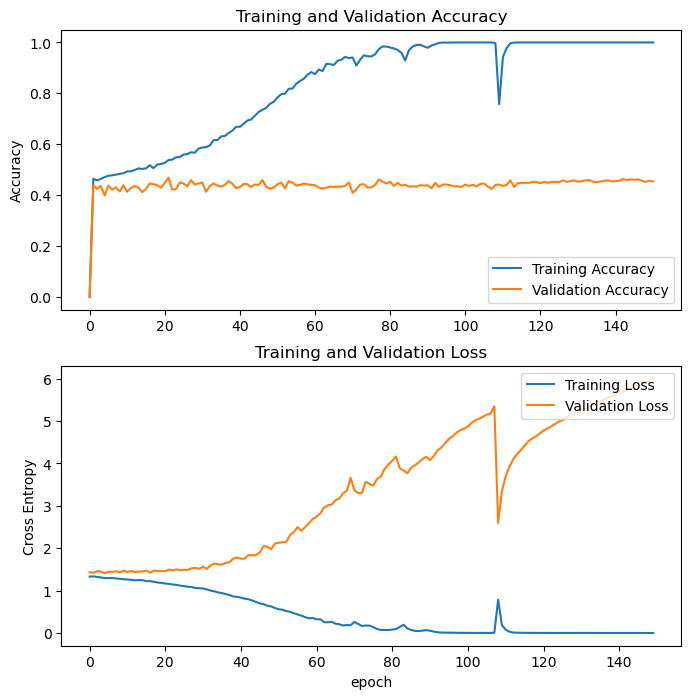

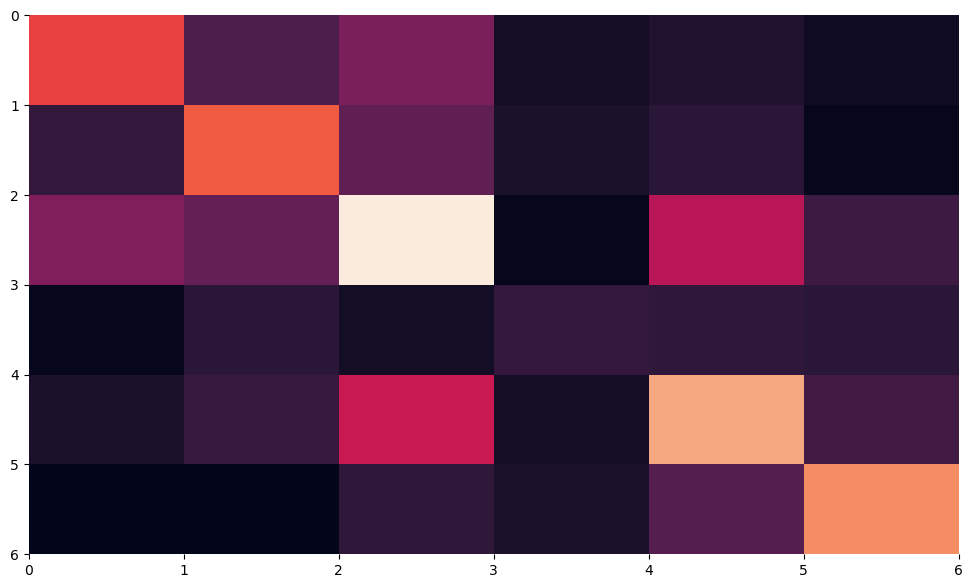

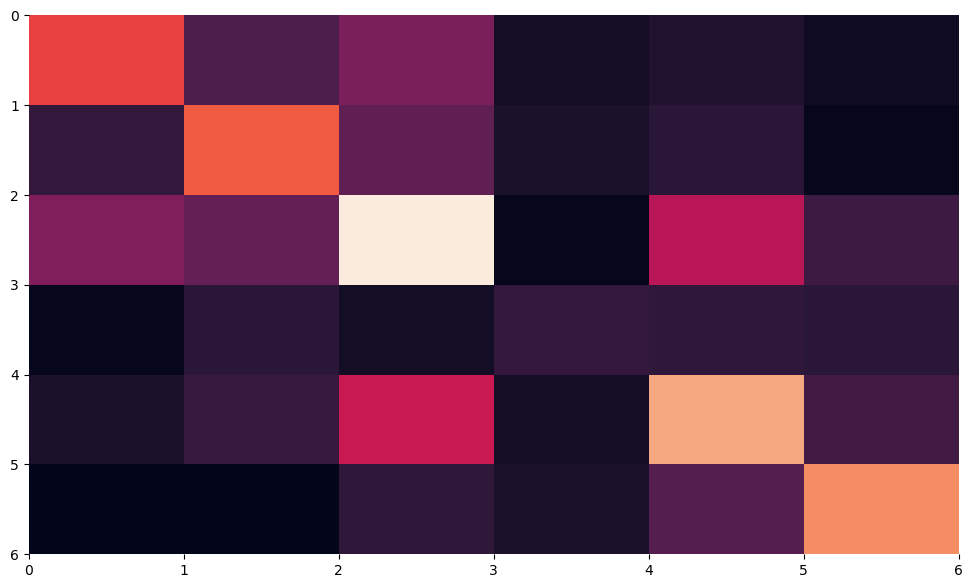

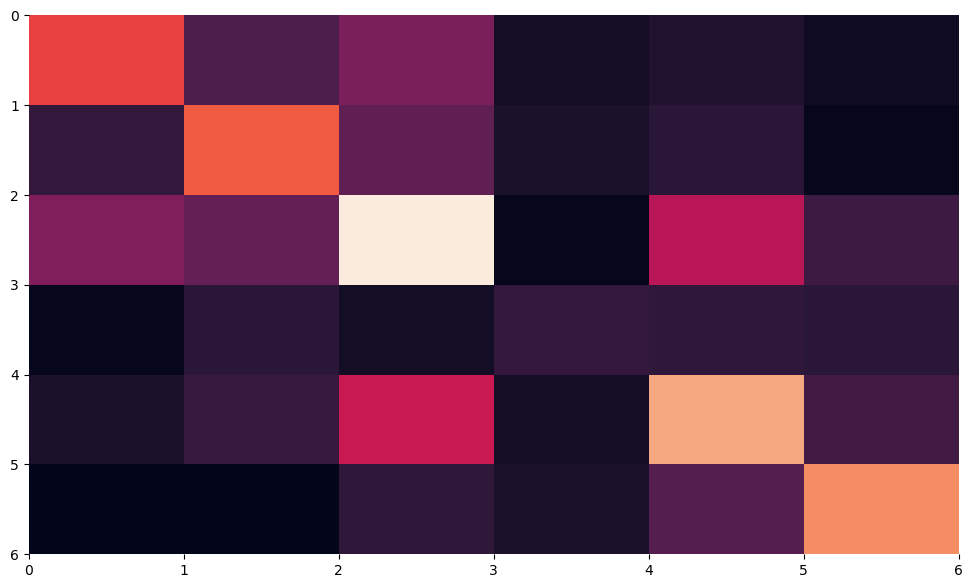

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [42]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_check, y_pred)
cm = pd.DataFrame(
    conf, index=[i for i in emotion_names], columns=[i for i in emotion_names]
)

plt.figure(figsize=(12, 7))
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_title(f'Confusion Matrix for Model')
plt.show()


In [43]:
from sklearn.metrics import classification_report

print(f'Model Confusion Matrix\n', classification_report(y_check, y_pred, target_names=emotion_names))


Model Confusion Matrix
               precision    recall  f1-score   support

       angry       0.49      0.44      0.46       116
     excited       0.45      0.49      0.47       112
 frustration       0.43      0.43      0.43       191
       happy       0.30      0.23      0.26        56
     neutral       0.43      0.45      0.44       155
         sad       0.56      0.59      0.58       108

    accuracy                           0.45       738
   macro avg       0.44      0.44      0.44       738
weighted avg       0.45      0.45      0.45       738

